# Welcome to the Time-series Forecasting Lab

## In this Lab you'll learn how to:
* Load and preprocess time series data
* Apply classic statistical models for future predictions
* Apply neural network architectures for supervised forecasting tasks
* Visualize and evaluate your models' results

In [1]:
!pip3 install --upgrade pip
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install statsmodels
!pip3 install pmdarima

# Part 1 - Statistical Models for forecasting

# Monthly Air Passengers (Time-Series Dataset #1)

## 1.1 Load and Visualize dataset


For building classic statistical models, we will use as time-series data, the monthly air passengers dataset. It includes monthly air passengers records between 1949–1960.

In the next cell we [load the dataset in a pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), print its entries and plot its column (number of passengers per month).

We also use [pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) to print the summary of statistics of the given Dataframe. Descriptive statistics summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

*Your task is after loading the dataset, to plot its column and print the summary of the statistics.*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm

# Read data from csv to pandas
df=pd.read_csv("https://onedrive.live.com/download?cid=AE69638675180117&resid=AE69638675180117%2199349&authkey=AKbu0mIgDimBPTE", sep=',', parse_dates=['Month'], index_col='Month')
print('Number of rows and columns:', df.shape)
df

Number of rows and columns: (144, 1)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


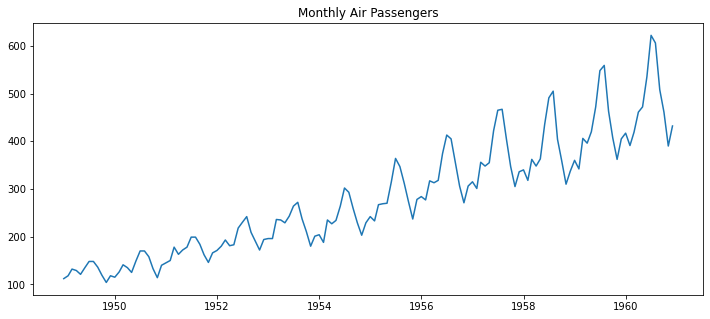

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [3]:
# Fill your code here
# Plot the #Passengers column (Monthly passengers for the years available)
plt.figure(figsize=(12,5))
plt.plot(df.loc[:,'#Passengers'])
plt.title('Monthly Air Passengers')
plt.show()

# Print statistics for the df using describe() function
df.describe()

## 1.2 Time-series decomposition

A series is thought to be an aggregate or combination of four components. All series have a level and noise. The trend and seasonality components are optional. It is helpful to think of the components as combining either additively or multiplicatively.

An additive model suggests that the components are added together as follows:
$y(t) = trend + cycle + seasonality + remainder$

To obtain an overview of the time-series characteristics we will use the statsmodels library to perform a time-series decomposition. The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html). 

The decomposition of time series is a statistical method to deconstruct time series into its trend-cycle, seasonal and residual components. It requires that you specify whether the model is additive or multiplicative and uses moving average smoothing.

*Your task is to decompose the series and plot the result.*

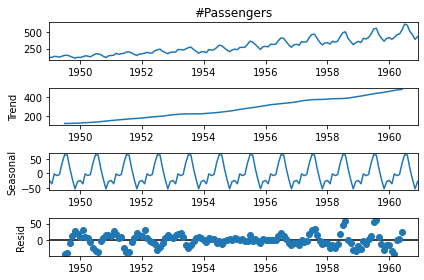

In [4]:
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose

# Fill your code here
# Decompose the time-series in trend, seasonality, noise components using seasonal_decompose() function
# Plot the results of decomposition
seasonal_decomposition = seasonal_decompose(df['#Passengers'], freq=12, model='additive')
seasonal_decomposition.plot()
plt.show()

The decomposition plot indicates that the monthly number of air passengers has an increasing trend and also a seasonal pattern.

## 1.3 Model Identification

In this step, we need to examine whether the time-series is stationary. If it is not, we have to find a transformation to make it stationary.

A time series is stationary when its statistical properties such as mean, variance, and autocorrelation are constant over time. In other words, time series is stationary when it is not dependent on time and doesn't have a trend or seasonal patterns. Most classical statistical forecasting methods are based on the assumption that time-series is stationary.

We can check stationarity by using different approaches:
- From the decomposition plot above and the calculated statistics, we noticed that the data have trend and seasonality.
- We can plot the autocorrelation and the partial autocorrelation function plots, which provide information about the dependency of time series values to their previous values.
- We can apply statistical tests for stationarity, such as the Augmented Dickey-Fuller test.

We will examine the second approach in the next cells.

### ACF and PACF plots
Statistical correlation summarizes the strength of the relationship between two variables.
We can assume that the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables.
The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with observations with previous time-steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the **Autocorrelation Function**, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot. A **Partial Autocorrelation Function**, or PACF, is a summary of the relationship between an observation in a time series with observations at prior time-steps with the relationships of intervening observations removed. The autocorrelation for an observation and an observation at a prior time-step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time-steps.

If the time series is stationary, the ACF/PACF plots will show a quick cut off after a small number of lags.

We can show the autocorrelation plot of the given time-series using the [plot_acf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html) function from the statsmodels library and the partial autocorrelation plot using the [plot_pacf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html) function.

*Your task is to calculate the acf and pacf and plot them in the same plot that is already created below.*

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

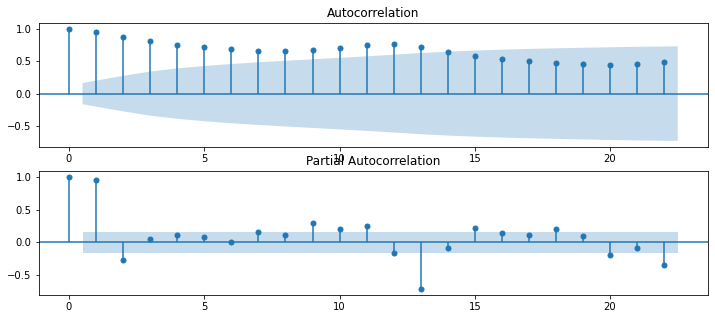

In [6]:
# Fill your code here
# Create the figure for 2 subplots
# Use plot_acf, plot_pacf to plot ACF and PACF on the given figure
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,5))
ax1 = plot_acf(df, ax=ax1)
ax2 = plot_pacf(df, ax=ax2)
plt.show()

Here we see that both ACF and PACF plots do not show a quick cut off into the 95% confidence interval area (in blue) which means that the time-series is not stationary.

**Trend and seasonality in ACF plots:**
When data has a trend, the autocorrelations for small lags tend to be large and positive because observations nearby in time are also close in size. So the ACF of trended time series tends to have positive values that slowly decrease as the lags increase. When the data is seasonal, the autocorrelations will be larger for the seasonal lags (at multiples of the seasonal frequency) than for other lags. When the data is both trended and seasonal, you see a combination of these effects. The slow decrease in the ACF as the lags increase is due to the trend, while the “scalloped” shape is due to the seasonality.

### Transform the time-series to stationary

There are two main parts for non-stationary time-series, trend and seasonality. We can apply differencing to make the time series stationary by subtracting the value of the previous observation from the current. Since the time-series has both trend and seasonal components, we apply one non-seasonal differencing (between observations in t, t-1) and one seasonal differencing (between observations in t, t-12). 

We can easily create a new dataframe from the existing df, using pandas.DataFrame.diff() function for differencing all the elements.

*Your task is to difference the time-series once for trend and once for seasonality.*

In [7]:
# Fill your code here
# We use pandas.diff() function to calculate the differenced series 
# First for periods=1 (x(t)=y(t)-y(t-1)) and then for periods=12 (x(t)-x(t-12))
df_diff = df.diff().diff(12)

# Some NaN values are created that we need to remove using pandas.dropna()
print(df_diff)
df_diff.dropna(inplace=True)
print(df_diff.shape)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01        -27.0
1960-09-01         -2.0
1960-10-01          9.0
1960-11-01        -26.0
1960-12-01         -1.0

[144 rows x 1 columns]
(131, 1)


### Plot PACF/ACF after the transformation
We repeat the tests for stationarity for the transformed time-series.
For the differenced time series (1 differencing for trend and 1 for seasonality) we proceed by plotting its values, the ACF and PACF plots. 

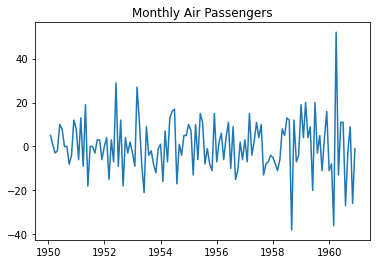

In [8]:
# Plot the differenced time series 
plt.plot(df_diff['#Passengers'])
plt.title('Monthly Air Passengers')
plt.show()

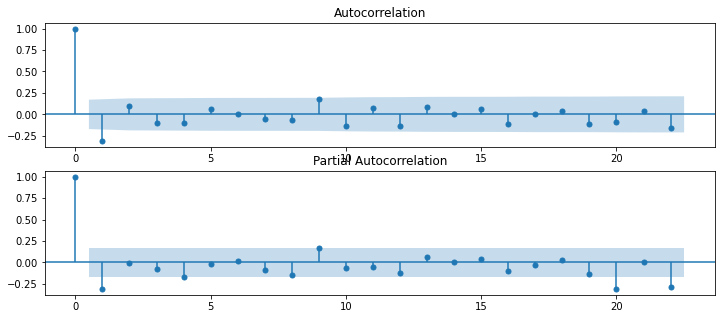

In [9]:
# We plot ACF, PACF for the differenced time-series
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,5))
ax1 = plot_acf(df_diff, ax=ax1)
ax2 = plot_pacf(df_diff, ax=ax2)
plt.show()

After running the stationarity tests again, we notice that the plot of the differenced time-series, does not show any specific trend or seasonal patterns, ACF/PACF plots have a quick cut-off. So we have confirmed that the transformed data is stationary.

### Split the dataset in train, test
We divide our dataset into train and test sets in order to fit the model in the train set and evalute its performance on the test set. This split should be done with respect to the order of time-steps and with no overlapping, since we are working with time-series data.The train set will be used to find the optimal parameters for our statistical models. The test set (unseen data) will be used for the evaluation of our model.

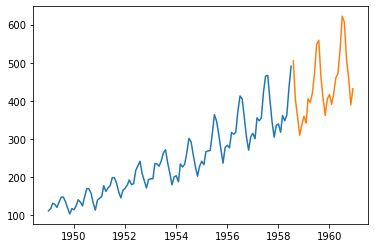

In [10]:
# First we divide the data into train and test set
# We use 80% for training and the rest for testing
train = df[:int(0.8*(len(df)))]
test = df[int(0.8*(len(df))):]

# We plot train and test data in the same plot
plt.figure()
plt.plot(train['#Passengers'])
plt.plot(test['#Passengers'])
plt.show()

### Model Parameter Estimation

After the statistical analysis, we will use the Seasonal Autoregressive Integrated Moving Average (SARIMA or Seasonal-ARIMA) for time-series forecasting. It is an extension of ARIMA that supports time series data with a seasonal component.

ARIMA stands for **Autoregressive Integrated Moving Average** and is one of the most common techniques of classical time series forecasting methods. ARIMA models are denoted with the order of ARIMA(p,d,q). A reminder on ARIMA equation:

The backshift operator $$B(X_t)=X_{t-1}, B^2(X_t)=X_{t-2},...,etc$$

Let $Y_t = \nabla^d{X_t} = (1-B)^d{X_t}$, based on the degree of differencing I($d$) then for $p$,$q$ parameters:

$$X_t = \phi_1X_{t-1}+\phi_2X_{t-2}+...+\phi_pX_{t-p}+W_t+\theta_1W_{t-1}+\theta_2W_{t-2}\theta_qW_{t-q} \tag{1}$$
$$\Rightarrow \phi_p(B)X_t = \theta_q(B)W_t$$
where $$\phi_p(B) = 1-\phi_1B-\phi_2B^2-...-\phi_pB^p \tag{1.a}$$
$$\theta_q(B) = 1+\theta_1B+\theta_2B^2+...+\theta_qB^q \tag{1.b}$$

SARIMA models are denoted with the order of SARIMA(p, d, q)(P, D, Q)[m].
- **AR(p)** is a regression model that utilizes the dependent relationship between an observation and some number of lagged observations.
- **I(d)** is the differencing order to make the time series stationary.
- **MA(q)** is a model that uses the dependency between an observation and a residual error applied to lagged observations.

**(P, D, Q)[m]** are the additional set of parameters that specifically describe the seasonal components of the model. P, D, and Q represent the seasonal regression, differencing, and moving average coefficients respectively, and m represents the number of data points in each seasonal cycle. Alternatively, we can explain the length of the cycle, as the number of periods necessary to pass before the tendency reappears. If we want to inspect a seasonal trend, we need to make sure to set the appropriate cycle length. 

**SARIMA(p, d, q)(P, D, Q)[m]** has the form:
$$\phi_p(B)\Phi_P(B^m)(1-B)^d(1-B^m)^DX_t = \theta_q(B)\Theta_Q(B^m)W_t \tag{2}$$
where $$\Phi_P(B^m) = 1-\Phi_1B^m-\Phi_2B^{2m}-...-\Phi_pB^{Pm} \tag{2.a}$$
$$\Theta_Q(B^m) = 1+\Theta_1B^m+\Theta_2B^{2m}+...+\Theta_qB^{Qm} \tag{2.b}$$

We will use pmdarima library, to automatically calculate the best parameters for the Seasonal ARIMA model. 

We call the [pmdarima.auto_arima](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html) function, where we specify:
- d=1 and D=1 in order to calculate the differencing, once for the trend and once for the seasonality.
- m=12, since we have monthly data.
- trend='C', to include a constant.
- seasonal=True, to fit a seasonal-ARIMA.
- trace=True, to print information on the fits.
- start_p = start_q = 0, the initial values for p,q.
- max_order = 6, the maximum sum of p,q,P,Q parameters in each combination.
- stepwise = True, to use the stepwise algorithm outlined in Hyndman and Khandakar (2008) to identify the optimal model parameters. The stepwise algorithm can be significantly faster than fitting all hyper-parameter combinations and is less likely to over-fit the model.
- test='adf', the type of unit root test to use in order to detect stationarity.

The output for each combination helps us to determine the best parameters based on the minimum AIC score.

*Your task is to call pm.auto_arima with the above mentioned parameters, to evaluate different models on the train series.*

In [11]:
warnings.filterwarnings('ignore')
import pmdarima as pm

# We call pm.auto_arima with the above mentioned parameters
# This function returns the best models and show the results of fit for the different combinations of parameters
model = pm.auto_arima(train['#Passengers'], d=1, D=1,
                      seasonal=True, m=12, trend='c', 
                      start_p=1, start_q=1, max_order=6, 
                      test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=760.181, Time=0.92 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=759.772, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=757.666, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=758.296, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=757.438, Time=0.08 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=757.897, Time=0.41 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=759.568, Time=0.45 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=758.709, Time=0.20 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=757.961, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=757.951, Time=0.09 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=759.915, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=757.438, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 3.371 seconds


The results of auto_arima function indicate that the lowest AIC score is obtained when the parameters equal to (1, 1, 0)(0, 1, 0, 12). We print the summary of this model.

## 1.4 Forecasting - Model Evaluation 
We fit Seasonal ARIMA (SARIMAX) using the [SARIMAX function](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html), with the chosen orders on our train set and print the summary of the model.

*Your task is to fit SARIMAX with the selected parameters and print its summary.*

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fill your code here
# Call SARIMAX function with the selected values for the parameters p,d,q,P,D,Q,m
model = SARIMAX(train['#Passengers'],order=(1,1,0),seasonal_order=(0,1,0,12))
SARIMAX_results = model.fit()

For the fitted model we want to ensure that the residuals are normally distributed with zero mean and that they are uncorrelated.

To see the residuals statistics, we can print the model's diagnostics with [SARIMAXResults.plot_diagnostics](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.plot_diagnostics.html). This function produces a 2x2 plot grid with the following plots (ordered clockwise from top left):
- Standardized residuals over time
- Histogram plus the estimated density of standardized residuals, along with a Normal(0,1) density plotted for reference.
- Normal Q-Q plot, with Normal reference line (graphical method for comparing two probability distributions by plotting their quantiles against each other)
- Correlogram

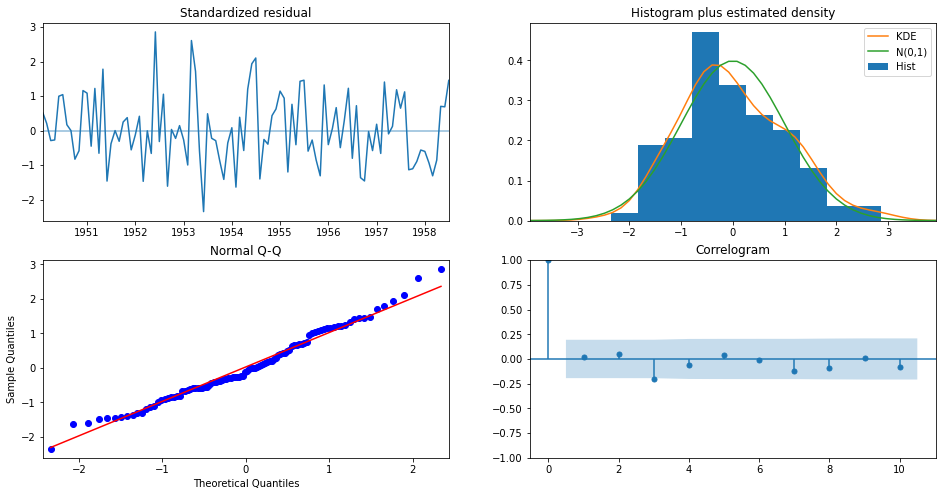

In [13]:
SARIMAX_results.plot_diagnostics(figsize=(16, 8))
plt.show()

Residual indeed is the difference between true and predicted value. If there are correlations between residuals - there is information left in the residuals which should be used in computing forecasts. If the residuals have a mean other than zero, then the forecasts are biased. 
- The top left plot which shows the residuals over time, appears to be a white noise with no seasonal component. A good fit shows that there are no obvious patterns in the residuals.
- The top right plot shows that the kde line is close to the $N(0,1)$, which is the standard notation of normal distribution with zero mean and standard deviation of 1. This means that the residuals are normally distributed. 
- The bottom left plot shows that the ordered distribution of residuals is close to the linear trend of the samples taken from a standard normal distribution, which also suggests that the residuals are normally distributed. For a good fit most of the data points should lie on the straight line.
- The bottom right, that is a correlogram plot indicates that the residuals have a low correlation with the lagged versions. In a good fit, 95% of correlations for lag greater than one, should not be significant, so the residuals are white noise.

### Get forecasts for test set
We then call [get_forecasts](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.get_forecast.html) function on SARIMAX model, which returns prediction results, an instance containing in-sample predictions and out-of-sample forecasts. We have to define the parameter steps as the number of steps to forecast from the end of the sample.

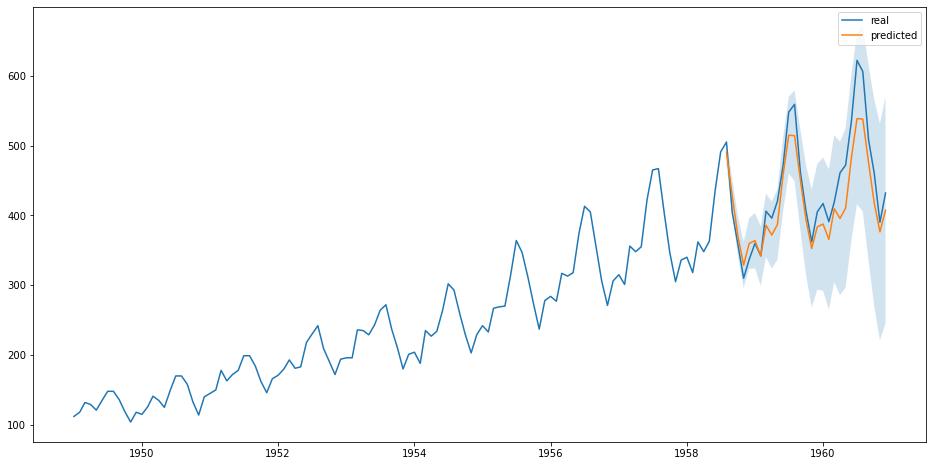

In [14]:
prediction_object = SARIMAX_results.get_forecast(steps=len(test))
plt.figure(figsize=(16,8))

# Plot real values of monthly Air passengers
plt.plot(df.index, df, label='real')

# Plot the prediction means
plt.plot(prediction_object.predicted_mean.index, prediction_object.predicted_mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(prediction_object.predicted_mean.index, prediction_object.conf_int().iloc[:,0],  prediction_object.conf_int().iloc[:,1],
alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

Following, we use the [predict function](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.predict.html) to print  the forecasts in an alternative way (we need to define the start and end points for predictions).

*Your task is to call the predict function on the results of SARIMAX fit above for test set.*

In [15]:
# Fill your code here
start=len(train)
end=len(train)+len(test)-1
predictions = SARIMAX_results.predict(start=start, end=end, typ='levels').rename('SARIMA(1,1,0)(0,1,0,12) Predictions')

# Compare predictions to the real values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]}, real={test['#Passengers'][i]}")

predicted=490.337910972445, real=505
predicted=427.8830431255652, real=404
predicted=370.77141310068976, real=359
predicted=328.7942722594871, real=310
predicted=359.7895912505783, real=337
predicted=363.79054980922865, real=360
predicted=341.79035351934675, real=342
predicted=385.7903937148191, real=406
predicted=371.7903854837479, real=396
predicted=386.79038716927437, real=420
predicted=458.7903868241188, real=472
predicted=514.7903868947984, real=548
predicted=514.12829785277, real=559
predicted=451.67343000885404, real=463
predicted=394.5617999833716, real=407
predicted=352.58465914229316, real=362
predicted=383.5799781333591, real=405
predicted=387.58093669201463, real=417
predicted=365.58074040213154, real=391
predicted=409.58078059760413, real=419
predicted=395.5807723665328, real=461
predicted=410.5807740520593, real=472
predicted=482.58077370690376, real=535
predicted=538.5807737775834, real=622
predicted=537.918684735555, real=606
predicted=475.46381689163906, real=508
predi

Since we have made our predictions on the test set we can calculate some evaluation metrics on the regression model. We print the r2_score, the mean_absolute_error and the mean_squared_error.

- **r2_score** is defined as: $R^2 = 1- \frac{\sum_{i=1}^{n}(x_i-y_i)^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$, where $y_i$ is the prediction and $x_i$ is the true value. The r2_score function computes the coefficient of determination, usually denoted as R². It represents the proportion of variance (of x) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. A higher value of $R^2$ is desirable as it indicates better results.
- **mean_absolute_error (MAE)** is defined as: the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. $MAE = \frac{1}{n}\sum_{i=1}^{n}\lvert{y_i-x_i}\rvert$, where $y_i$ is the prediction and $x_i$ is the true value.
- **mean_squared_error (MSE)** is defined as:  the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. $MSE = \frac{1}{n}\sum_{i=1}^{n}({y_i-x_i})^2$, where $y_i$ is the prediction and $x_i$ is the true value.
- **mean_absolute_percentage_error (MAPE)** is defined as: a measure of prediction for forecasting which expresses the accuracy as a ratio defined by the formula $MAPE = \frac{1}{n}\sum_{i=1}^{n}\lvert{\frac{x_i-y_i}{x_i}}\rvert$, where $y_i$ is the prediction and $x_i$ is the true value. The MAPE is also sometimes reported as a percentage, which is the above equation multiplied by 100.

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

evaluation_metrics = pd.DataFrame({'r2_score': r2_score(test['#Passengers'], predictions)}, index=[0])
evaluation_metrics['mean_absolute_error'] = mean_absolute_error(test['#Passengers'], predictions)
evaluation_metrics['mean_squared_error'] = mean_squared_error(test['#Passengers'], predictions)
evaluation_metrics['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test['#Passengers'])/np.abs(test['#Passengers']))*100 

evaluation_metrics

,r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
0,0.798377,28.547409,1230.803759,6.12455


### Our Conclusions on statistical models for forecasting:
- Statistical Models remain throughout the years very effective in time-series forecasting
- Applying different methods needs previous identification of the datasets statistical properties and adjustment of the specifications of the models
- They also require feature engineering and an intuition about the time-series properties and patterns
- Forecasting becomes very slow and complex for big time-series
- They are also more compatible with univariate time-series and can be used in 1-step ahead forecasting

# Part 2 - Deep Learning Models for forecasting

# Mackey Glass (Time-Series Dataset #2)

## 2.1 Data preprocessing and creation of datasets for supervised learning


In [17]:
!pip3 install scikit-learn
!pip3 install keras

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


For reproducing our code and getting the same results for comparisons, especially while training neural networks, we need to set the random seeds for numpy library and keras. We will use the following code for a first initialization ([numpy.random.seed](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html), [tensorflow.random.set_seed](https://www.tensorflow.org/api_docs/python/tf/random/set_seed)). We will run again these instructions before training a new model together with [keras.backend.clear_session](https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session).

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os

import tensorflow as tf
import keras
from keras.models import Input, Sequential, load_model, Model
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Conv1D, Flatten, MaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint

from numpy.random import seed
seed(100)
tf.random.set_seed(100)

### 2.1.1 Load and Visualize Data

The **Mackey-Glass** equation is the nonlinear time delay differential equation
$$ \frac{dy}{dt} = c \frac{y_{t-\tau}}{1+y_{t-\tau}^n}-b y(t)$$$$c,b,n>0$$
where $c, \tau, b, n$ real numbers and $y_{t-\tau}$ represents the value of the variable $y$ at time $t-\tau$. Depending on the values of the parameters, this equation displays a range of periodic and chaotic
dynamics. The behaviour of these equations manages to mimic both healthy and pathological behaviour in certain biological contexts.

The function create_mackey_glass_dataset() takes as input the number $N$ of the desired time-steps and returns a time-series based on the mackey-glass equation.

*Your task is load to the dataset into a pandas after calling the function create_mackey_glass_dataset() and print it.*

In [19]:
def create_mackey_glass_dataset(N = 2000):
    b   = 0.1
    c   = 0.2
    tau = 17

    y = [0.9697, 0.9699, 0.9794, 1.0003, 1.0319, 1.0703, 1.1076, 1.1352, 1.1485,
         1.1482, 1.1383, 1.1234, 1.1072, 1.0928, 1.0820, 1.0756, 1.0739, 1.0759]

    for n in range(17,N+99):
        y.append(y[n] - b*y[n] + c*y[n-tau]/(1+y[n-tau]**10))
    y = y[100:]
    return y

In [20]:
y = create_mackey_glass_dataset()
df = pd.DataFrame(y,columns=['Mackey-glass'])
df

,Mackey-glass
0,0.933143
1,0.917522
2,0.902385
3,0.890816
4,0.886532
...,...
1995,0.612803
1996,0.608896
1997,0.620557
1998,0.650573


Next, we can visualize the evolution of the series over time.

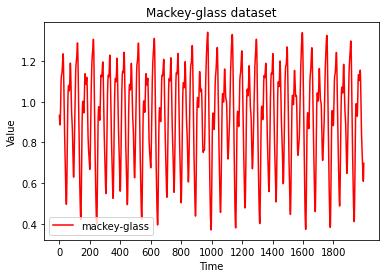

In [21]:
# Plot time series from pandas
plt.plot(df['Mackey-glass'], color = 'red', label = 'mackey-glass')
plt.xticks(np.arange(0,len(df),200))
plt.title('Mackey-glass dataset')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### 2.1.2 Feature Selection & Train, Test split 

We define a function ***split_data*** for splitting our initial pandas to 3 different pandas to create our train, validation and test sets. The function split_data keeps the first 80% of time-steps for train, the next 10% for validation and the last 10% for test. No overlapping exists between the 3 respective pandas and the order of time-steps is maintained. 

In [22]:
# The function below receives a pandas dataframe (df) 
# and creates 3 different dataframes for train, validation, test sets with respect to the order of time-steps
# Input: df - the initial pandas.dataframe
# Output: df_train (first 80% of the time series), df_val (next 10%), df_test (final 10%)

def split_data(df):
    times = sorted(df.index.values)
    last_10pct = sorted(df.index.values)[-int(0.1*len(times))]  # Last 10% of series
    last_20pct = sorted(df.index.values)[-int(0.2*len(times))]  # Last 20% of series
    
    df_train = df[(df.index < last_20pct)]  # Training data are 80% of total data
    df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
    df_test = df[(df.index >= last_10pct)]

    return df_train, df_val, df_test

Before applying ***split_data*** to our data, we select the different feature columns on which we will train our model, by defining a list of columns' names. Here we have only 1 column since the tim series is univariate.

*Your task is to split the dataset into train, validation and test sets using split_data() and print their shapes.*

In [23]:
# Define the features that will be used for training
train_columns = ['Mackey-glass']

# Fill your code here
# Get only the train_columns part of pandas 
# Call split_data function  and print the shape of each set
df_train, df_val, df_test = split_data(df[train_columns])
print('Train \n', df_train)
print('Val \n', df_val)
print('Test \n', df_test)

Train 
       Mackey-glass
0         0.933143
1         0.917522
2         0.902385
3         0.890816
4         0.886532
...            ...
1595      1.341314
1596      1.339445
1597      1.323542
1598      1.291010
1599      1.243828

[1600 rows x 1 columns]
Val 
       Mackey-glass
1600      1.186463
1601      1.123312
1602      1.057647
1603      0.991623
1604      0.926606
...            ...
1795      0.925546
1796      0.909715
1797      0.895117
1798      0.885010
1799      0.883189

[200 rows x 1 columns]
Test 
       Mackey-glass
1800      0.893208
1801      0.917017
1802      0.953603
1803      0.998169
1804      1.042832
...            ...
1995      0.612803
1996      0.608896
1997      0.620557
1998      0.650573
1999      0.697330

[200 rows x 1 columns]


### 2.1.3 Scaling with MinMaxScaler

After turning pandas to arrays, we apply scaling to train, validation and test sets. 

We select the [Min-Max Scaler from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), which is defined as follows for the feature $X$:
$$X_{std} = \frac{(X - X.min)}{(X.max - X.min)}$$
$$X_{scaled} = X_{std} * (max - min) + min$$ where (min, max) is the new feature range.
This estimator scales and translates each feature individually so that it is in the given range on the training set, e.g. between zero and one.

In [24]:
# Transform pandas to numpy arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values

print('Train data has shape', np.shape(train_data))
print('Validation data has shape', np.shape(val_data))
print('Test data has shape', np.shape(test_data))

Train data has shape (1600, 1)
Validation data has shape (200, 1)
Test data has shape (200, 1)


*Your task is to apply scaling to train, val, test sets separately.*

In [25]:
# Fill your code here
# Feature Scaling using Min-Max Scaler
# Use fit_transform for train_data and transform for val, test data
scaler = MinMaxScaler(feature_range = (0, 1))
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)
test_data = scaler.transform(test_data)

### 2.1.4 Create datasets for supervised tasks

We define a function ***create_supervised_data*** that takes as input an array of (time-steps, features) and two variable 'seq_len', 'ahead'. For each time-step it creates a history of 'seq_len' past values, thus generates samples/subsequences by applying a sliding window over the given time-series. Our window (of length 'seq_len' is slided for 1 step at each time, thus, we create overlapping subsequences as samples. For each sample that it creates, it also keeps a target of length 'ahead', that contains the values of the feature that we want to predict in the next time-steps. The targets of the samples are stored in a separate array. In the simplest case, for 1-step ahead predictions we use ahead=1. 

An example for seq_len=4, ahead=1 is given below.

![Split](https://am3pap003files.storage.live.com/y4mrcOxSbWcBjWOgayr4vt8km7WkE7eXEBO0g-DBmiWtQyj8OwBNJfRQXHFn_DuAlXAvyglpfPr5nCrn9zWZOtyTSKYGB-EtxfYgub9a_3bdysWoIYjY68e4xwwjavDE6cNVSSZPgfGCi7bE9azxFW1EJDPjdhVElddGLAUglsdVzOBE-qjzTAG6mdwCCJiSUyr?width=448&height=384&cropmode=none)

*Your task is to fill the function create_supervised_data() based on the instructions above.*

In [26]:
# The function below creates a dataset of samples with 'seq_len' time-steps as history 
# and 1-step ahead value as target 
# Input: data (array), seq_len (int, defining the number of time-steps that are used as history to create each sample), 
# ahead (int, defining the number of time-steps that are used as targets
# Output: 
# X - array with shape (samples, seq_len, len(train_columns)), contains historical features per sample
# y - array with shape (samples,), contains the target, 
# that matches the index of feature that we want to predict in the future

# Fill your code here
def create_supervised_data(data, seq_len=20, ahead=1):
    X = []
    y = []
        
    for i in range(seq_len, len(data)-ahead+1):
        X.append(data[i-seq_len:i,:])
        y.append(data[i:i+ahead,:])  
    X, y = np.array(X), np.array(y)
    return X,y

We call ***create_supervised_data*** twice, for train data and validation data and create two respective datasets.

In [27]:
# Set the desirable history for creating samples from the time-series
seq_len = 20
ahead = 1
X_train, y_train = create_supervised_data(train_data, seq_len=seq_len, ahead=ahead)
print('X_train shape is ', np.shape(X_train))
print('y_train shape is ', np.shape(y_train))

X_val, y_val = create_supervised_data(val_data, seq_len=seq_len, ahead=ahead)
print('X_val shape is ', np.shape(X_val))
print('y_val shape is ', np.shape(y_val))

X_test, y_test = create_supervised_data(test_data, seq_len=seq_len, ahead=ahead)
print('X_test shape is ', np.shape(X_test))
print('y_test shape is ', np.shape(y_test))

X_train shape is  (1580, 20, 1)
y_train shape is  (1580, 1, 1)
X_val shape is  (180, 20, 1)
y_val shape is  (180, 1, 1)
X_test shape is  (180, 20, 1)
y_test shape is  (180, 1, 1)


## 2.2 1-D CNN model for 1-step ahead forecasting
**CNNs** and more specifically 2D Convolutions, are traditionally used for processing and learning features of images. For the last years though, there has been a huge number of successes in **applying convolutions to 1D data**, such as in natural language processing tasks, audio etc. In these cases 1D Convolutions can be used as alternatives to traditional recurrent neural networks (RNNs) such as LSTMs and GRUs. Unlike RNNs, they can be run in parallel for really fast computations.

For applying temporal convolutions we can use layer [**Conv1D from keras**](https://keras.io/api/layers/convolution_layers/convolution1d/). This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs. To apply this layer to our input with shape (seq_len, features_dimension) we need to define:
- filters: integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
- kernel_size: an integer or tuple/list of a single integer, specifying the length of the 1D convolution window.

The 1D convolutional layer is followed by a [**Max Pooling 1D layer**](https://keras.io/api/layers/pooling_layers/max_pooling1d/) and a Dense layer with 'relu' activation. We finally add a Dense layer to produce the output. Max pooling operation for 1D temporal data downsamples the input representation by taking the maximum value over the window defined by pool_size. Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features.

![1D_CNN.png](https://am3pap003files.storage.live.com/y4mF-xwl5WwWIPXqvj5o_NxZn2Ir4glSM46WQMnwLVtx5RaJVfjnr3a5tPsxxYjl_e0nCjPdVRlcBoygIiC_XeEWbB2WypWuh-Ot1hiZO7eccWyug_MonjpZM4FxFGR1cetPKH-1I7A4emItKsRO7uYrxRHl6n5Jt4rxK5Qn4z26sZf5UDIlMM9ckBJgLSLy_ea?width=395&height=363&cropmode=none)
*Your task is to add a Conv1D layer + MaxPooling + Flatten + Dense for 1-step forecasting in create_model_cnn below.*

In [28]:
keras.backend.clear_session()
seed(100)
tf.random.set_seed(100)

def create_model_cnn(seq_len, features_dimension):
    # Fill your code here
    in_seq = Input(shape=(seq_len, features_dimension))
    x = Conv1D(filters=16, kernel_size=2, activation='relu')(in_seq)
    x = MaxPooling1D(pool_size=2)(x)
    x = Flatten()(x)
    x = Dense(units=32, activation='relu')(x)
    out = Dense(units = 1)(x)
    model = Model(inputs=in_seq, outputs=out)
    return model

In [29]:
model = create_model_cnn(np.shape(X_train)[1], np.shape(X_train)[2])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 19, 16)            48        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 9, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4640      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,721
Trainable params: 4,721
Non-trainable params: 0
____________________________________________________

We use the [**Adam optimizer**](https://keras.io/api/optimizers/adam/) and **Mean squared error (MSE)** as loss function for training. Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. We also keep and update a model checkpoint during training based on the loss of the model on the validation dataset. 

Our aim is to forecast 1-step ahead for 1 feature of the initial series. For this reason our final layer in the 1-step forecasting models that follow, is a [**Dense layer**](https://keras.io/api/layers/core_layers/dense/).

To avoid overfitting and check our models loss evolution through training we use [**Early Stopping from keras**](https://keras.io/api/layers/core_layers/dense/) in respect to validation loss. We save our best model weights (based on validation loss) in a Checkpoint through [**ModelCheckpoint callback**](https://keras.io/api/callbacks/model_checkpoint/).

In [30]:
def compile_and_fit(model, X, y, X_val, y_val, patience=2, max_epochs=100):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(X, y, epochs=max_epochs,
                      validation_data=(X_val, y_val),
                      callbacks=[early_stopping])
    return history

In [31]:
def plot_loss(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    return 

In [32]:
def print_metrics_model(X_train, y_train, X_val, y_val, X_test, y_test):
    print('Evaluation metrics')
    print(
        'Training Data - MSE Loss: {:.8f}, MAE Loss: {:.8f}'.format(
                                                    model.evaluate(X_train, y_train, verbose=0)[0], 
                                                    model.evaluate(X_train, y_train, verbose=0)[1]))
    print(
        'Validation Data - MSE Loss: {:.8f}, MAE Loss: {:.8f}'.format(
                                                    model.evaluate(X_val, y_val, verbose=0)[0],
                                                    model.evaluate(X_val, y_val, verbose=0)[1]))
    print(
        'Test Data - MSE Loss: {:.8f}, MAE Loss: {:.8f}'.format(
                                                    model.evaluate(X_test, y_test, verbose=0)[0],
                                                    model.evaluate(X_test, y_test, verbose=0)[1]))

In [33]:
# Visualize the results
def plot_predictions_test(y_test, predictions):
    plt.plot(np.arange(len(y_test)),y_test, color = 'red', label = 'Real')
    plt.plot(np.arange(len(predictions)),predictions, color = 'green', label = 'Predicted')
    plt.xticks(np.arange(0,len(predictions),10))
    plt.title('Mackey-glass Prediction')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    return

In [34]:
history = compile_and_fit(model, X_train, y_train, X_val, y_val, patience=10)

Epoch 1/100
50/50 [==============================] - 0s 6ms/step - loss: 0.1185 - mean_absolute_error: 0.2785 - val_loss: 0.0469 - val_mean_absolute_error: 0.1868
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0267 - mean_absolute_error: 0.1418 - val_loss: 0.0135 - val_mean_absolute_error: 0.1022
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0079 - mean_absolute_error: 0.0776 - val_loss: 0.0068 - val_mean_absolute_error: 0.0703
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0044 - mean_absolute_error: 0.0562 - val_loss: 0.0046 - val_mean_absolute_error: 0.0553
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0030 - mean_absolute_error: 0.0440 - val_loss: 0.0037 - val_mean_absolute_error: 0.0462
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_absolute_error: 0.0383 - val_loss: 0.0032 - val_mean_absolute_error: 0.0406
Epoch 7/100
50/50 [===

50/50 [==============================] - 0s 3ms/step - loss: 6.9872e-05 - mean_absolute_error: 0.0066 - val_loss: 8.5684e-05 - val_mean_absolute_error: 0.0074
Epoch 50/100
50/50 [==============================] - 0s 3ms/step - loss: 6.1310e-05 - mean_absolute_error: 0.0062 - val_loss: 9.0309e-05 - val_mean_absolute_error: 0.0074
Epoch 51/100
50/50 [==============================] - 0s 3ms/step - loss: 6.8586e-05 - mean_absolute_error: 0.0065 - val_loss: 8.2983e-05 - val_mean_absolute_error: 0.0072
Epoch 52/100
50/50 [==============================] - 0s 3ms/step - loss: 6.0938e-05 - mean_absolute_error: 0.0061 - val_loss: 8.1407e-05 - val_mean_absolute_error: 0.0073
Epoch 53/100
50/50 [==============================] - 0s 2ms/step - loss: 5.7204e-05 - mean_absolute_error: 0.0059 - val_loss: 8.3437e-05 - val_mean_absolute_error: 0.0074
Epoch 54/100
50/50 [==============================] - 0s 3ms/step - loss: 5.8450e-05 - mean_absolute_error: 0.0060 - val_loss: 7.4504e-05 - val_mean_abso

Epoch 97/100
50/50 [==============================] - 0s 2ms/step - loss: 5.7038e-05 - mean_absolute_error: 0.0057 - val_loss: 5.5845e-05 - val_mean_absolute_error: 0.0057
Epoch 98/100
50/50 [==============================] - 0s 2ms/step - loss: 5.2144e-05 - mean_absolute_error: 0.0054 - val_loss: 8.6793e-05 - val_mean_absolute_error: 0.0070


In [35]:
print_metrics_model(X_train, y_train, X_val, y_val, X_test, y_test)

Evaluation metrics
Training Data - MSE Loss: 0.00007175, MAE Loss: 0.00646023
Validation Data - MSE Loss: 0.00008679, MAE Loss: 0.00703944
Test Data - MSE Loss: 0.00007562, MAE Loss: 0.00657847


(180, 1)


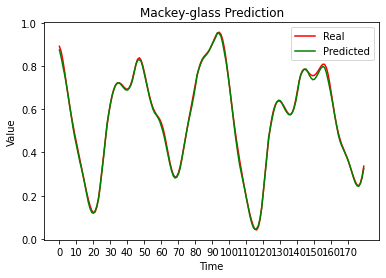

In [36]:
predictions = model.predict(X_test)
print(predictions.shape)

plot_predictions_test(y_test.squeeze(), predictions)

## 2.3 Dilated CNNs for multi-step ahead forecasting (predicting a vector output)

We will try to create a simple architecture inspired by a simplified version of the **WaveNet model**, from [***WaveNet: A Generative Model for Raw Audio, OOrd et al., Sep. 2016***](https://arxiv.org/pdf/1609.03499.pdf). This idea can be applied to any time series forecasting problem, providing a different structure for capturing long-term dependencies and minimizing the excessive number of learnable weights for traditional CNNs.

The core building block of the wavenet model is the dilated causal convolution layer. It utilizes some other key techniques like gated activations and skip connections, but for in this lab we'll focus on the central idea of the architecture for simplicity. 

**Causal Convolutions**

In the simple [1-dimensional convolution layer](https://keras.io/api/layers/pooling_layers/max_pooling1d/) (as shown earlier), a filter of weights slides across the input series, covering all the regions of the series (usually with overlapping). The shape of the output depends on the sequence padding used, and is closely related to the connection structure between inputs and outputs. For instance, a filter of width 2, stride of 1, and no padding means that the output sequence will have one fewer entry than the input. We can adjust our convolution layers to explicitly prohibit the future from influencing the past. In other words, we only allow inputs to connect to future time step outputs in a causal structure. In practice, this causal 1D structure is easy to implement by shifting traditional convolutional outputs by a number of timesteps. Keras achieves it by setting **padding = 'causal'**.

**Dilated (Causal) Convolutions**

With causal convolutions we have the proper tool for handling temporal flow, but we need an additional modification to properly handle long-term dependencies. In fact, we can add additional layers per time-step to reach further back in the series, so as to increase the output's receptive field.

Using simple convolutios to model the long history of a series, make our model way too computationally and statistically complex. WaveNet uses **dilated convolutions, which allow the receptive field to increase exponentially** as a function of the number of convolutional layers. In a dilated convolution layer, filters are not applied to inputs in a simple sequential manner, but instead skip a constant dilation rate inputs in between each of the inputs they process, as shown in the pricture above. By increasing the dilation rate multiplicatively at each layer (e.g. 1, 2, 4, 8, ...), we can achieve the exponential relationship between the number of layer and receptive field size that we desire. 

![TCN](https://am3pap003files.storage.live.com/y4mxOC8fkKkQ8B_bOjIfdafK88eeDnxIEN25KgyLNBe4kGpXRCMNFtE_KyUSW3G8iOtGk0Yjj4Moipvj3JOoezGhp2ubIzyLNjZ9bjskXy0YuZbZDr9yMY2WJFA5KPr2uaAzQ32y5-tx4zchE-bsPxMEemzoWT-7r_WaJAaGDZOa9mIwj5A7NS3TQXNuyTbxGYb?width=1422&height=522&cropmode=none)

In the following cell we stack dilated convolutions of different dilation rates, followed by a Flatten and a Dense layer in order to get the final prediction. The convolutional layers that encode past information are then followed by a dense layer that learns directly a fixed size vector output that corresponds to the forecasting horizon.

*Your task is to add stacked Conv1D layers with a kernel size of 2 in order to achieve the receptive for the given history length, followed by a Dense layer for the final multi-step ahead predictions.*

We **repeat part 2.1.4** to produce the train, validation and test datasets for multi-step forecasting, using a fixed horizon $\tau_{max}$.

In [37]:
# Set the desirable history for creating samples from the time-series
seq_len = 64
ahead = 64
X_train_multi, y_train_multi = create_supervised_data(train_data, seq_len=seq_len, ahead=ahead)
print('X_train shape is ', np.shape(X_train_multi))
print('y_train shape is ', np.shape(y_train_multi))

X_val_multi, y_val_multi = create_supervised_data(val_data, seq_len=seq_len, ahead=ahead)
print('X_val shape is ', np.shape(X_val_multi))
print('y_val shape is ', np.shape(y_val_multi))

X_test_multi, y_test_multi = create_supervised_data(test_data, seq_len=seq_len, ahead=ahead)
print('X_test shape is ', np.shape(X_test_multi))
print('y_test shape is ', np.shape(y_test_multi))

X_train shape is  (1473, 64, 1)
y_train shape is  (1473, 64, 1)
X_val shape is  (73, 64, 1)
y_val shape is  (73, 64, 1)
X_test shape is  (73, 64, 1)
y_test shape is  (73, 64, 1)


In [38]:
keras.backend.clear_session()
seed(100)
tf.random.set_seed(100)

def create_model_dilated_cnn(seq_len, features_dimension, ahead):
    # Fill your code here
    model = Sequential()
    model.add(Input(shape=(seq_len, features_dimension)))
    dilation_rates = (1, 2, 4, 8, 16, 32)
    for rate in dilation_rates:
        model.add(Conv1D(filters=16, kernel_size=2, padding="causal",
                                  activation="relu", dilation_rate=rate))
    model.add(Flatten())
    model.add(Dense(units = ahead))
    return model

In [39]:
model = create_model_dilated_cnn(np.shape(X_train_multi)[1], np.shape(X_train_multi)[2], ahead)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 64, 16)            48        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 64, 16)            528       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 64, 16)            528       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 64, 16)            528       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 64, 16)            528       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 64, 16)            528       
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [40]:
history = compile_and_fit(model, X_train_multi, y_train_multi, X_val_multi, y_val_multi, patience=10)

Epoch 1/100
47/47 [==============================] - 1s 16ms/step - loss: 0.1406 - mean_absolute_error: 0.3002 - val_loss: 0.0479 - val_mean_absolute_error: 0.1713
Epoch 2/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0385 - mean_absolute_error: 0.1607 - val_loss: 0.0242 - val_mean_absolute_error: 0.1283
Epoch 3/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0283 - mean_absolute_error: 0.1367 - val_loss: 0.0208 - val_mean_absolute_error: 0.1194
Epoch 4/100
47/47 [==============================] - 1s 15ms/step - loss: 0.0249 - mean_absolute_error: 0.1279 - val_loss: 0.0195 - val_mean_absolute_error: 0.1124
Epoch 5/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0217 - mean_absolute_error: 0.1185 - val_loss: 0.0191 - val_mean_absolute_error: 0.1161
Epoch 6/100
47/47 [==============================] - 1s 15ms/step - loss: 0.0184 - mean_absolute_error: 0.1068 - val_loss: 0.0163 - val_mean_absolute_error: 0.1056
Epoch 7/100
47/4

47/47 [==============================] - 0s 10ms/step - loss: 2.2042e-04 - mean_absolute_error: 0.0109 - val_loss: 3.7092e-04 - val_mean_absolute_error: 0.0147
Epoch 50/100
47/47 [==============================] - 0s 10ms/step - loss: 2.1656e-04 - mean_absolute_error: 0.0109 - val_loss: 3.5650e-04 - val_mean_absolute_error: 0.0136
Epoch 51/100
47/47 [==============================] - 0s 10ms/step - loss: 2.1913e-04 - mean_absolute_error: 0.0109 - val_loss: 3.9194e-04 - val_mean_absolute_error: 0.0138
Epoch 52/100
47/47 [==============================] - 0s 10ms/step - loss: 2.1488e-04 - mean_absolute_error: 0.0108 - val_loss: 6.7644e-04 - val_mean_absolute_error: 0.0207
Epoch 53/100
47/47 [==============================] - 0s 10ms/step - loss: 2.6225e-04 - mean_absolute_error: 0.0122 - val_loss: 2.9651e-04 - val_mean_absolute_error: 0.0127
Epoch 54/100
47/47 [==============================] - 0s 10ms/step - loss: 1.9320e-04 - mean_absolute_error: 0.0104 - val_loss: 3.5756e-04 - val_mea

47/47 [==============================] - 0s 10ms/step - loss: 9.8315e-05 - mean_absolute_error: 0.0075 - val_loss: 1.9427e-04 - val_mean_absolute_error: 0.0108
Epoch 97/100
47/47 [==============================] - 0s 10ms/step - loss: 1.1236e-04 - mean_absolute_error: 0.0080 - val_loss: 1.5406e-04 - val_mean_absolute_error: 0.0098
Epoch 98/100
47/47 [==============================] - 0s 10ms/step - loss: 9.0799e-05 - mean_absolute_error: 0.0071 - val_loss: 2.5997e-04 - val_mean_absolute_error: 0.0133
Epoch 99/100
47/47 [==============================] - 0s 10ms/step - loss: 1.1858e-04 - mean_absolute_error: 0.0082 - val_loss: 1.8095e-04 - val_mean_absolute_error: 0.0105
Epoch 100/100
47/47 [==============================] - 0s 10ms/step - loss: 1.1498e-04 - mean_absolute_error: 0.0082 - val_loss: 4.7005e-04 - val_mean_absolute_error: 0.0172


In [41]:
print_metrics_model(X_train_multi, y_train_multi, X_val_multi, y_val_multi, X_test_multi, y_test_multi)

Evaluation metrics
Training Data - MSE Loss: 0.00032401, MAE Loss: 0.01426593
Validation Data - MSE Loss: 0.00047005, MAE Loss: 0.01724338
Test Data - MSE Loss: 0.00024158, MAE Loss: 0.01230876


In [42]:
def plot_multi_step_forecasts(X_test, y_test, predictions, ncols=4, nrows=3):
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,6), dpi=150)
    for i, ax in enumerate(axes.flat):
        plot_idx = np.random.choice(np.arange(0, len(predictions)))
        
        if len(np.shape(predictions))==3:
            y_pred = predictions[plot_idx,:,:].squeeze()
        else:
             y_pred = predictions[plot_idx,:]
        y_true = np.concatenate([X_test[plot_idx,:,:].squeeze(), y_test[plot_idx,:,:].squeeze()])
        y_pred = np.concatenate([X_test[plot_idx,:,:].squeeze(), y_pred])

        ax.plot(y_pred, color='red', label='preds')
        ax.plot(y_true, color='green', label='true')
        ax.vlines(np.shape(X_test)[1]-1, np.min(y_true), np.max(y_true), color='black', linestyle='dashed')
        ax.legend()

(73, 64)


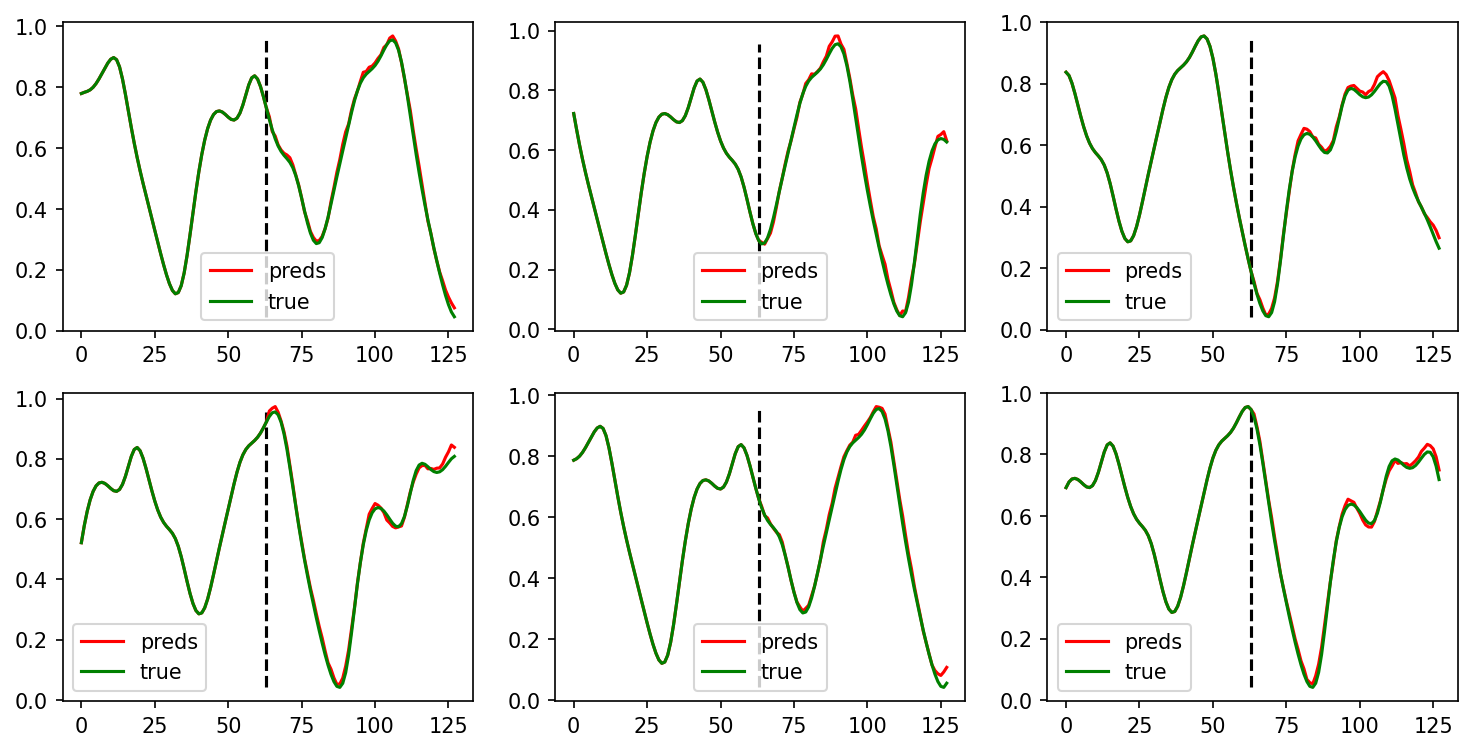

In [43]:
predictions = model.predict(X_test_multi)
print(predictions.shape)

plot_multi_step_forecasts(X_test_multi, y_test_multi, predictions, 3, 2)

### Our Conclusions on deep learning models for forecasting:
- There are several architectures that are promising, with mechanisms that try to extract patterns and remember behaviours from the past.
- Generally is easy for models to capture the general trends and values, but they struggle to learn more fine-grained changes. 
- DL models need the creation of samples and datasets. This can automatically be done with [generators for time-series](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/TimeseriesGenerator), or you can apply the functions that we created here (such as the function create_supervised_data). 
- You may need to explore the effect of different transformations to your data (such as Scaling or even differencing and log transformations). Generally our purpose in DL is to minimize feature engineering and data-driven approaches.
- An important factor is the number of time-steps to look back, when creating samples, or the history that you take for your predictions. This is a parameter with which you have to do experiments, but generally we are aiming in using architectures that are able to learn as many time-steps back as possible, in an efficient way.
- Apart from the traditional LSTMs, CNNs with some variations can memorize the past. They also achieve faster training and can learn with less parameters. This helps in working with larger datasets/history to look back and minimizes memory and time constraints in training.
- An import factor is the optimization of the hyperparameters of the DL architectures. There are several libraries for tuning, such as the [keras tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner), which can help you run experiments for different combinations of hyperparameters and select those that best fit your dataset.
- Other important aspects to explore in time-series forecasting are:
    - Multi-step forecasting using autoregressive models (iterative decoding apart from direct methods such as seq2seq and vector output)
    - Attention layers with LSTMs (inspired by models for NLP)
    - Other hybrid models